In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ml/USArrests.csv', index_col=0)

In [6]:
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [7]:
df.isnull().sum()

,0
Murder,0
Assault,0
UrbanPop,0
Rape,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 4.0+ KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


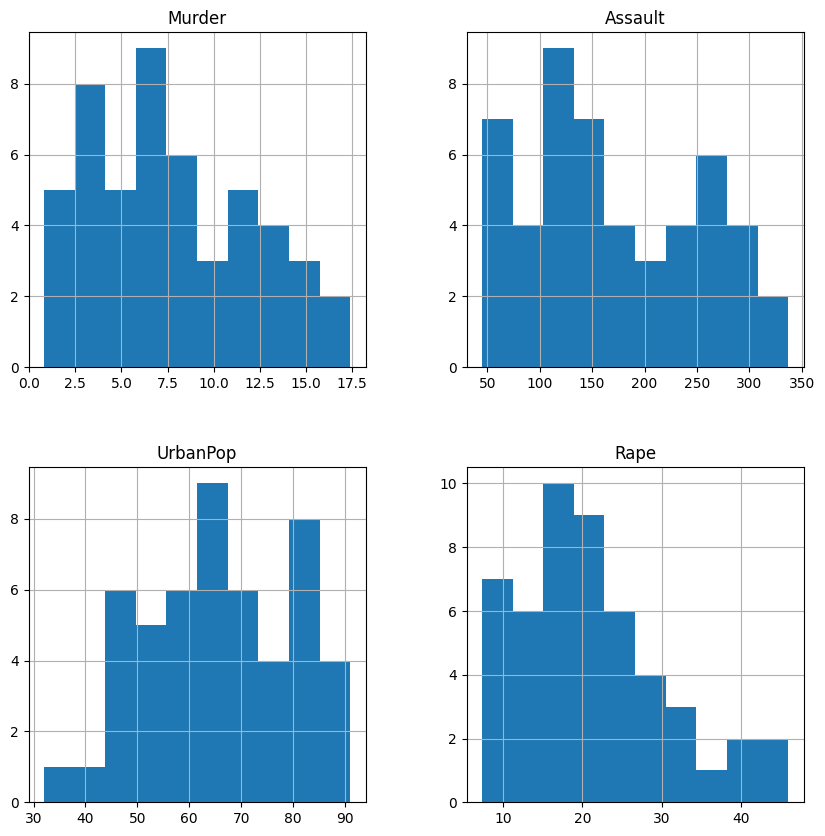

In [10]:
df.hist(figsize=(10, 10))
plt.show()

**k-means-clustering model**

In [11]:
kmeans = KMeans(n_clusters=4)

In [15]:
k_fit = kmeans.fit(df)

In [16]:
k_fit.n_clusters

4

In [18]:
k_fit.cluster_centers_
# 4 farklı kümenin merkezinde yer alan gözlem birimleri

array([[  5.59      , 112.4       ,  65.6       ,  17.27      ],
       [ 11.8125    , 272.5625    ,  68.3125    ,  28.375     ],
       [  2.95      ,  62.7       ,  53.9       ,  11.51      ],
       [  8.21428571, 173.28571429,  70.64285714,  22.84285714]])

In [19]:
k_fit.labels_

array([1, 1, 1, 3, 1, 3, 0, 1, 1, 3, 2, 0, 1, 0, 2, 0, 0, 1, 2, 1, 3, 1,
       2, 1, 3, 0, 0, 1, 2, 3, 1, 1, 1, 2, 0, 3, 3, 0, 3, 1, 2, 3, 3, 0,
       2, 3, 3, 2, 2, 3], dtype=int32)

**Visualization**

In [21]:
k_means = KMeans(n_clusters=2).fit(df)

In [23]:
clusters = k_means.labels_
clusters

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)

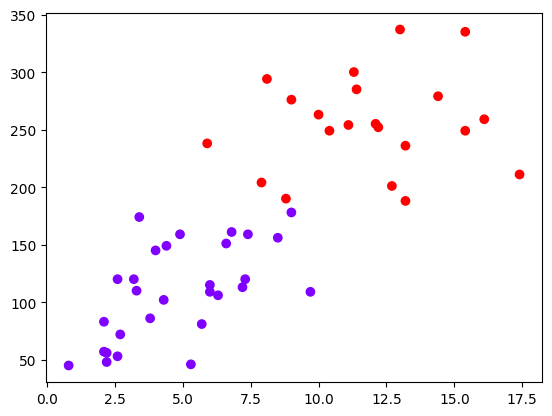

In [29]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=clusters, cmap='rainbow');

In [30]:
centers = k_means.cluster_centers_
centers

array([[  4.84137931, 109.75862069,  64.03448276,  16.24827586],
       [ 11.85714286, 255.        ,  67.61904762,  28.11428571]])

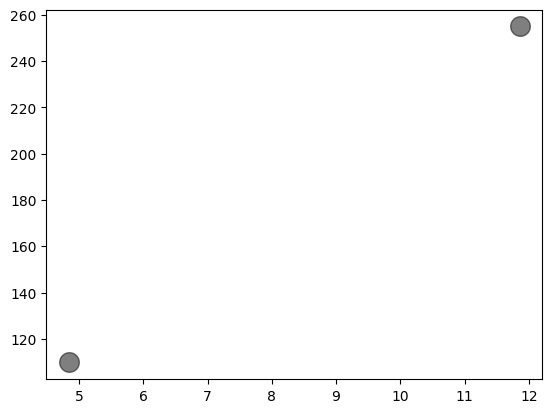

In [31]:
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

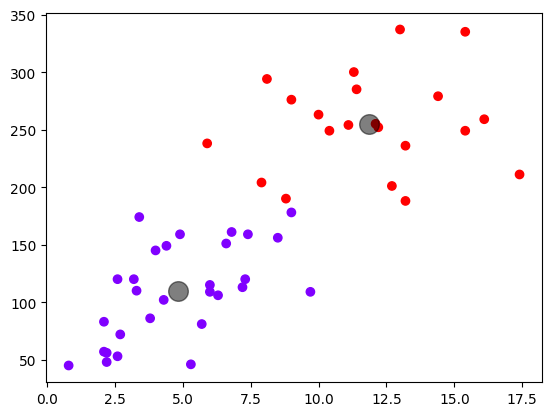

In [32]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=clusters, cmap='rainbow');
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

# **Determining the optimum number of clusters**

**Elbow method**

In [35]:
wcss = []   # Within-Cluster Sum of Squares:
            # Aynı kümeye ait olan veri noktalarının merkezlerine olan uzaklıklarının karelerinin toplamıdır.

K = range(1,11)

for k in K:
  kmeans = KMeans(n_clusters = k).fit(df)
  wcss.append(kmeans.inertia_) # KMeans algoritmasının her kümeleme için hesapladığı wcss (inertia) değeri

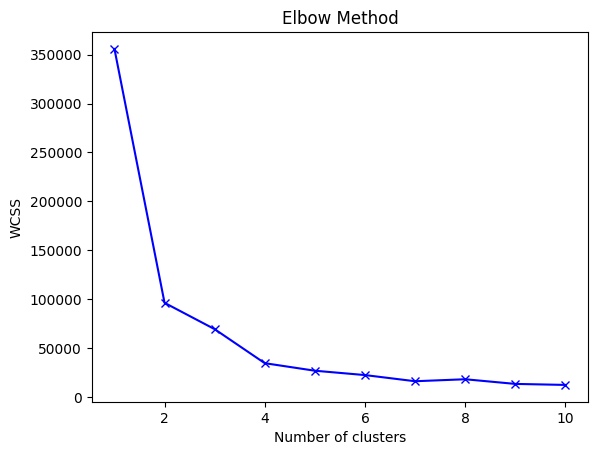

In [34]:
plt.plot(K, wcss, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

# **KElblowvisualization**

In [36]:
!pip install yellowbrick

In [37]:
from yellowbrick.cluster import KElbowVisualizer

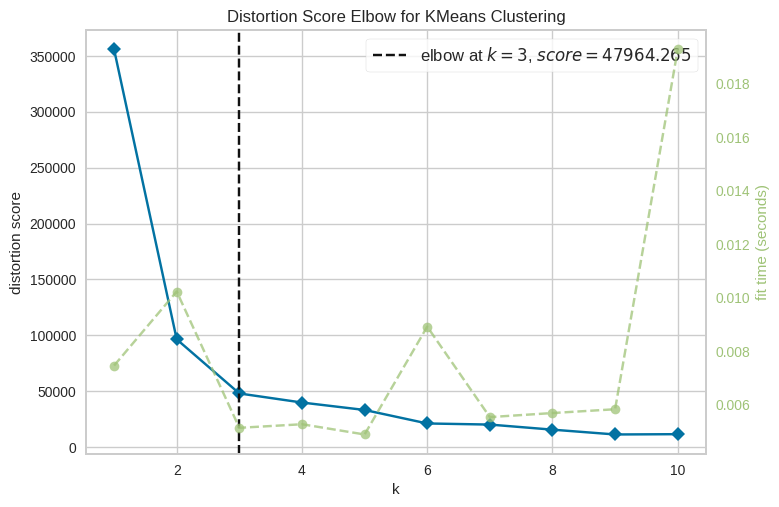

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [41]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1,11)).fit(df)
visualizer.poof()

**Final Model**

In [42]:
kmeans = KMeans(n_clusters=4).fit(df)

In [43]:
clusters = kmeans.labels_
clusters

array([0, 0, 0, 2, 0, 2, 1, 0, 0, 2, 3, 1, 0, 1, 3, 1, 1, 0, 3, 0, 2, 0,
       3, 0, 2, 1, 1, 0, 3, 2, 0, 0, 0, 3, 1, 2, 2, 1, 2, 0, 3, 2, 2, 1,
       3, 2, 2, 3, 3, 2], dtype=int32)

In [44]:
pd.DataFrame({"States": df.index, "Clusters": clusters})

,States,Clusters
0,Alabama,0
1,Alaska,0
2,Arizona,0
3,Arkansas,2
4,California,0
5,Colorado,2
6,Connecticut,1
7,Delaware,0
8,Florida,0
9,Georgia,2


In [46]:
df["Clusters"] = clusters
df

,Murder,Assault,UrbanPop,Rape,Clusters
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,0
Arizona,8.1,294,80,31.0,0
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,0
Colorado,7.9,204,78,38.7,2
Connecticut,3.3,110,77,11.1,1
Delaware,5.9,238,72,15.8,0
Florida,15.4,335,80,31.9,0
Georgia,17.4,211,60,25.8,2
